In [4]:
%load_ext autoreload
%autoreload 2

In [1]:
import pof_piv as piv
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import trange

In [2]:
# Read all the images in a folder
series_name = 'pos4-4'
directory = 'data/' + series_name
images = piv.read_image_directory(directory, image_type='tif', timing=True)
background = cv.imread('data/backgrounds/' + series_name + '.tif', 
                       cv.IMREAD_GRAYSCALE)

Reading images: 100%|██████████| 20995/20995 [00:21<00:00, 993.67it/s] 


In [6]:
# Subtract the background from all images
# images = piv.subtract_background(images, background)

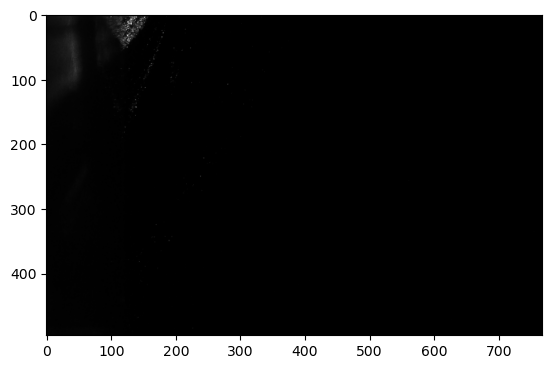

In [3]:
# Show the first image
plt.imshow(images[0], cmap='gray')
# If it does not exist, create a subfolder with the series name in the 'processed' directory
processed_directory = 'processed/' + series_name
if not os.path.exists(processed_directory):
    os.makedirs(processed_directory)

In [16]:
images.shape

(18145, 496, 768)

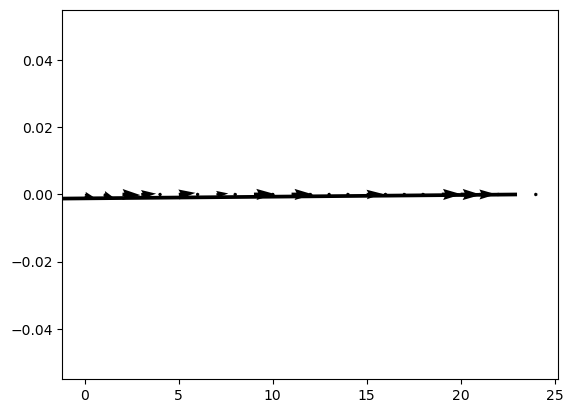

In [25]:
# PIV on specific images
displacements = piv.horizontal_flow_piv(images[10005:10007], (25,1), margins=(0, 0, 130, 0))

# Plot the displacements
fig, ax = plt.subplots()
ax.quiver(displacements[:, 1], displacements[:, 0])

In [26]:
import pof_piv as piv
y_window_count = 25

# Pre-allocate displacements array
displacements = np.zeros((len(images) - 1, y_window_count, 2))

# Loop over all images except the very final one
for i in trange(len(images) - 1):

    # Calculate the PIV between the current and the next image
    displacements[i] = piv.horizontal_flow_piv(images[i:i + 2], (y_window_count, 1), margins=(0, 0, 130, 0))



 27%|██▋       | 5672/20994 [02:06<05:48, 43.98it/s]/Users/tommieverouden/PycharmProjects/ETPoF/pof_piv/pof_piv/helper_functions.py:169: RuntimeWarning: invalid value encountered in scalar divide
  correction = [(0.5 * (np.log(neighbor[0]) - np.log(neighbor[2]))
100%|██████████| 20994/20994 [07:47<00:00, 44.94it/s]


In [27]:
# Save the displacements to a file
np.save(processed_directory + '/displacements_test.npy', displacements)

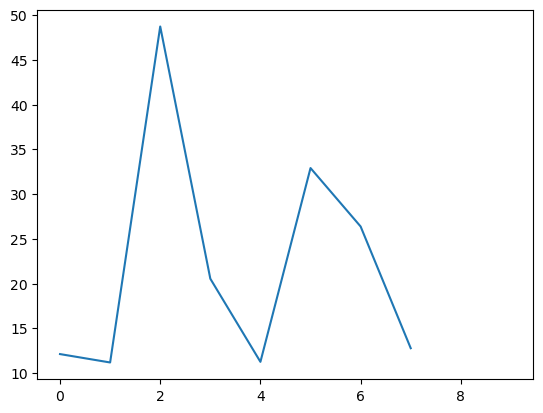

In [17]:
# Plot the mean displacement magnitude over time
fig, ax = plt.subplots()
ax.plot(np.mean(np.linalg.norm(displacements[10000:10010], axis=2), axis=1))
# ax.set_xlim(9000, 11000)

In [12]:
np.array([[[1,2]]])

array([[[1, 2]]])